<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-LH-1169213/blob/main/Visualizacion_Actividad_W6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 6, visualización

## Laura Elena Hernández Mata

## A01169213

### Ciencia y analítica de datos (TC4029.10)

### Dra. María de la Paz Rico Fernández

1 noviembre 2022

In [57]:
# IMPORTAMOS LIBRERÍAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib as mpl

# 1. Descarga los datos y carga el dataset en tu libreta.

In [6]:
DatosOriginales = pd.read_csv("https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv", sep = ",")

df = pd.DataFrame(DatosOriginales)

# 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [14]:
# OBTENEMOS INFORMACIÓN DEL DF

np.shape(df)

(30000, 25)

In [18]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [16]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [21]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [23]:
df.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

In [24]:
# BÚSQUEDA DE NULOS

df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [25]:
# HACEMOS COPIA DE LA BD PARA BORRAR LOS NULOS

ndf = df.copy()

In [26]:
# ELIMINAMOS LOS NULOS 

ndf.dropna(inplace = True)
print("¿Existen valores nulos en el data frame?", ndf.isna().values.any())
print("Número de registros eliminados que estaban vacíos:", len(df) - len(ndf))

¿Existen valores nulos en el data frame? False
Número de registros eliminados que estaban vacíos: 42


# 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

In [27]:
ndf.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


***En la tabla se puede apreciar la tendenecia central, la cual está determinada por la media o mean, por su nombre en inglés. Esta variable, que también se conoce como promedio, muestra cuáles son los valores medios de cada columna. Por otro lado, la dispersión está determinada por la desviación estándar, que aparece con las siglas std. Dicha desviación nos dice qué tanto se podría mover el intervalo de los datos respecto a la media. Por lo tanto, a mayor desviación estándar, quiere decir que los datos se encuentran con mayor dispersión. Mientras que si ésta es pequeña, nos indica que el intervalo de los datos se encuentra cercano a la media. Igualmente, los perdentiles de 25%, 50% y 75% nos indican si la dispersión está sesgada hacia la derecha o hacia la izquierda. Ya que si en el primer cuartil (25%) se encuentra un bajo nivel de datos, quiere decir que la dispersión de datos tiene mayor concentración hacia la izquierda de la curva normal. En este sentido, el 50% y 75% tendrían la mayor cantidad de datos.***

# 5. Realiza el conteo de las variables categóricas.

In [45]:
var_categ = ["X2","X3","X4","X6","X7","X8","X9","X10","X11","Y"]
print("Conteo de variables categóricas:", df[var_categ].shape[1])

Conteo de variables categóricas: 10


# 6. Escala los datos, si consideras necesario

In [53]:
scaler = StandardScaler()
df_transformed = pd.DataFrame(scaler.fit_transform(ndf), columns=ndf.columns)

# 7. Reduce las dimensiones con PCA, si consideras necesario.


In [54]:
pca = PCA()
pca.fit(df_transformed)
pcaSummary = pd.DataFrame({'Standard deviation': np.round(np.sqrt(pca.explained_variance_), 2),
                          'Proportion of variance': np.round(pca.explained_variance_ratio_ * 100, 2),
                          'Cumulative proportion': np.round(np.cumsum(pca.explained_variance_ratio_) * 100, 2) 
                          })

pcaSummary = pcaSummary.transpose()
pcaSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary.columns) + 1)]
pcaSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
Standard deviation,2.56,2.05,1.25,1.21,1.03,0.99,0.99,0.96,0.95,0.94,...,0.72,0.63,0.51,0.50,0.43,0.36,0.26,0.20,0.16,0.15
Proportion of variance,26.21,16.81,6.22,5.90,4.25,3.94,3.88,3.66,3.63,3.54,...,2.10,1.59,1.04,1.00,0.75,0.53,0.28,0.16,0.10,0.09
Cumulative proportion,26.21,43.02,49.24,55.15,59.39,63.33,67.21,70.87,74.50,78.04,...,94.46,96.05,97.09,98.08,98.84,99.36,99.64,99.81,99.91,100.00


## 7.1 Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%


In [56]:
print("=============PC1=================")
print("** Más importante:")
print(pcsComponents_df.PC1.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC1.nsmallest(3))
print("=============PC2=================")
print("** Más importante:")
print(pcsComponents_df.PC2.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC2.nsmallest(3))
print("=============PC3=================")
print("** Más importante:")
print(pcsComponents_df.PC3.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC3.nsmallest(3))
print("=============PC4=================")
print("** Más importante:")
print(pcsComponents_df.PC4.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC4.nsmallest(3))
print("=============PC5=================")
print("** Más importante:")
print(pcsComponents_df.PC5.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC5.nsmallest(3))
print("=============PC6=================")
print("** Más importante:")
print(pcsComponents_df.PC6.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC6.nsmallest(3))
print("=============PC7=================")
print("** Más importante:")
print(pcsComponents_df.PC7.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC7.nsmallest(3))
print("=============PC8=================")
print("** Más importante:")
print(pcsComponents_df.PC8.nlargest(3))
print("** Menos importante:")
print(pcsComponents_df.PC8.nsmallest(3))

=============PC1=================
** Más importante:
X15    0.352207
X16    0.350088
X14    0.348067
Name: PC1, dtype: float64
** Menos importante:
X2   -0.021959
X4   -0.005613
ID    0.006110
Name: PC1, dtype: float64
=============PC2=================
** Más importante:
X1     0.311551
X20    0.150032
X14    0.149820
Name: PC2, dtype: float64
** Menos importante:
X8   -0.334882
X9   -0.334294
X7   -0.327936
Name: PC2, dtype: float64
=============PC3=================
** Más importante:
X4     0.474612
X19    0.283701
X18    0.266286
Name: PC3, dtype: float64
** Menos importante:
X5    -0.484060
X3    -0.324296
X12   -0.141867
Name: PC3, dtype: float64
=============PC4=================
** Más importante:
X5     0.434831
X19    0.328242
X20    0.297679
Name: PC4, dtype: float64
** Menos importante:
X4    -0.417918
X12   -0.175262
X13   -0.155609
Name: PC4, dtype: float64
=============PC5=================
** Más importante:
X2    0.613659
ID    0.499718
X3    0.404782
Name: PC5, dtype: fl

## 7.2 Indica la importancia de las variables en cada componente

In [55]:
pcsComponents_df = pd.DataFrame(pca.components_.transpose(), 
                                columns=pcaSummary.columns,
                                index=df_transformed.columns
                                )
pcsComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
ID,0.006110,0.022866,-0.059791,0.051966,0.499718,0.718127,-0.430928,-0.108595,-0.098123,-0.046328,...,0.031602,-0.029563,0.007611,0.000370,0.010375,-0.015359,0.014611,0.004424,0.009165,-0.002474
X1,0.065657,0.311551,0.009697,0.075621,-0.185065,-0.055089,-0.263424,-0.274418,0.009570,-0.033787,...,-0.752608,-0.017433,0.043249,-0.023423,0.006329,0.007100,-0.010106,0.014290,-0.000724,0.002799
X2,-0.021959,0.030585,0.027001,-0.076126,0.613659,-0.640803,-0.385843,0.013569,0.088498,-0.041055,...,0.112830,0.024683,-0.000447,0.021517,-0.004130,-0.001586,0.001640,-0.000811,-0.000914,0.000870
X3,0.019857,-0.088133,-0.324296,0.222394,0.404782,0.005658,0.421942,0.455617,-0.258410,0.058354,...,-0.376108,-0.021610,0.011117,-0.039142,0.003579,0.003005,-0.003292,0.000257,0.000979,0.001784
X4,-0.005613,-0.039648,0.474612,-0.417918,0.019174,0.174758,0.165200,0.197509,-0.103196,0.008975,...,0.135713,0.008403,0.007604,-0.013263,-0.005505,-0.001009,-0.002065,-0.000243,0.000811,-0.001295
X5,0.014035,0.062882,-0.484060,0.434831,-0.160148,0.007031,0.010500,-0.140703,0.036312,0.008156,...,0.434328,0.013270,0.000309,-0.000367,-0.005422,-0.006037,-0.000041,-0.001522,-0.000014,0.000287
X6,0.164556,-0.296787,-0.020456,0.019308,-0.103199,-0.009648,-0.146793,0.215451,-0.004067,-0.034111,...,-0.096540,-0.639366,-0.251160,-0.000211,0.137548,-0.035263,-0.005294,0.000853,-0.002252,0.000514
X7,0.197288,-0.327936,0.017176,0.048792,-0.040110,0.004421,-0.071150,0.046856,-0.078932,0.002240,...,-0.076724,0.285167,0.558081,-0.059396,-0.484985,0.140710,-0.032149,0.012618,0.002935,0.000105
X8,0.203296,-0.334882,0.061742,0.081453,-0.002717,-0.013031,-0.009320,-0.083938,-0.054763,-0.010465,...,-0.079536,0.529744,-0.099793,-0.156818,0.604974,-0.307291,0.026489,-0.027597,-0.008087,-0.004799
X9,0.209985,-0.334294,0.088549,0.106347,0.036421,-0.018993,0.019846,-0.192230,-0.033797,-0.017685,...,-0.058623,0.174991,-0.586290,0.062611,-0.224874,0.568515,0.016844,0.001289,0.013148,-0.001345


# 8. Elabora los histogramas de los atributos para visualizar su distribución

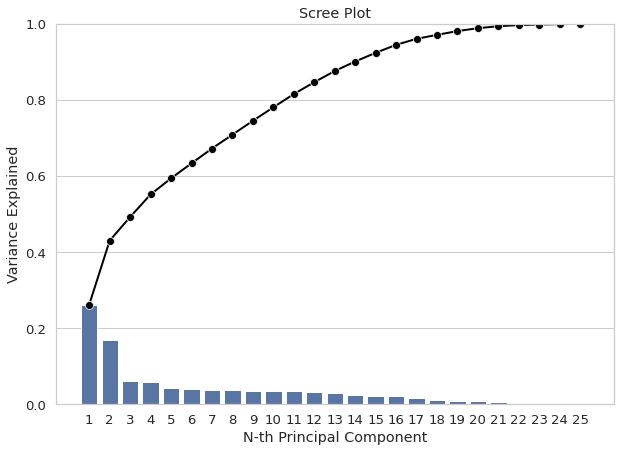

In [58]:
PC_components = np.arange(pca.n_components_) + 1

scree = sns.set(style = 'whitegrid', font_scale = 1.2)

fig, ax = plt.subplots(figsize=(10, 7))

scree = sns.barplot(x = PC_components, y = pca.explained_variance_ratio_, color = 'b')

scree = sns.lineplot(x = PC_components-1, 
                     y = np.cumsum(pca.explained_variance_ratio_), 
                     color = 'black', 
                     linestyle = '-', 
                     linewidth = 2, 
                     marker = 'o', 
                     markersize = 8
                    )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

# 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

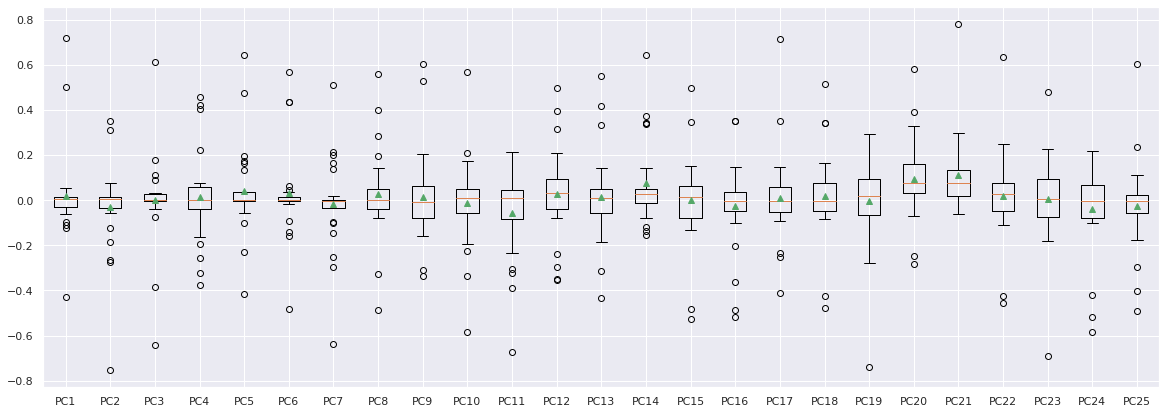

In [63]:
sns.set(rc={'figure.figsize':(20,7)})
aux = pcsComponents_df
plt.boxplot(aux, labels = pcaSummary.columns, showmeans=True)
plt.show()

In [65]:
sns.set(rc={'figure.figsize':(20,7)})
aux = pcsComponents_df
plt.jointplot(aux, labels = pcaSummary.columns, showmeans=True)
plt.show()

AttributeError: ignored

# 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.